# Skin Cancer

## 1.1 downloading the dataset

In [62]:
import kagglehub
import shutil

path = kagglehub.dataset_download("rm1000/skin-cancer-isic-images")
shutil.copytree(path, './data/skin-cancer')

'./data/skin-cancer'

## read and resize

In [25]:
import os
import pandas as pd
from PIL import Image
import numpy as np

benign_dir = './data/skin-cancer/benign'
malignant_dir = './data/skin-cancer/malignant'

benign_data = []
malignant_data = []

for filename in os.listdir(benign_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(benign_dir, filename)
        img = Image.open(img_path)
        img=img.resize((100,100))
        img_array = np.array(img)
        
        benign_data.append((img_array, "benign"))
for filename in os.listdir(malignant_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(malignant_dir, filename)
        img = Image.open(img_path)
        img=img.resize((100,100))
        img_array = np.array(img)
        
        malignant_data.append((img_array, "malignant"))

df = pd.DataFrame(benign_data+malignant_data, columns=['Image', 'Label'])

## normalization

In [40]:
for i in range(len(df["Image"])):
    df["Image"][i] = df["Image"][i]/255

C:\Users\arian\AppData\Local\Temp\ipykernel_9864\685974166.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Image"][i] = df["Image"][i]/255


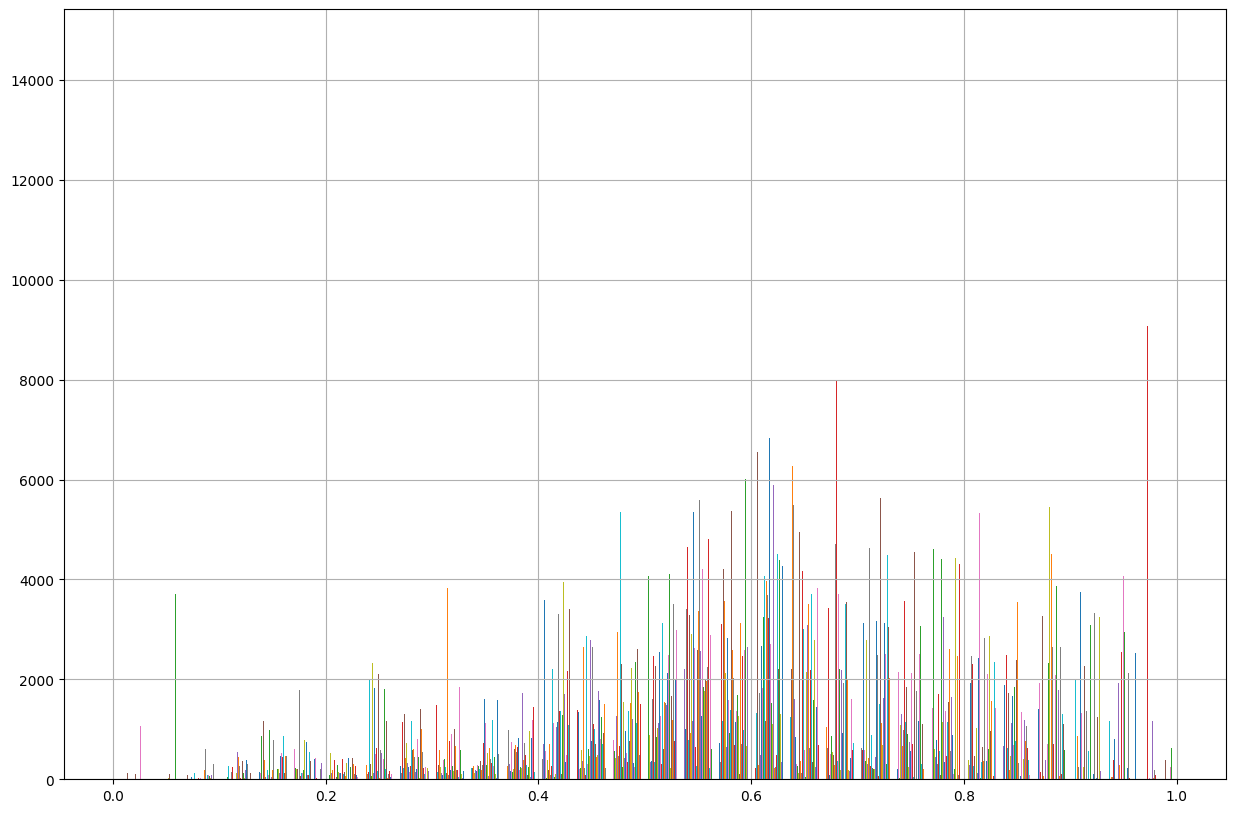

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['Image'].hist(bins=30, figsize=(15, 10))
plt.show()

## converting to grayscale

In [61]:
for i in range(len(df["Image"])):
    for j in range(len(df["Image"][i])):
        for k in range(len(df["Image"][i][j])):
            df["Image"][i][j][k]=df["Image"][i][j][k].sum()/3

## no augmentation yet

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1), use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', use_bias=True))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', use_bias=True))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=32, activation='relu', use_bias=True))
model.add(Dense(units=16, activation='relu', use_bias=True))
model.add(Dense(units=2, activation='sigmoid', use_bias=True)) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 98, 98, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │       204,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,690 (893.32 KB)

 Trainable params: 228,690 (893.32 KB)

 Non-trainable params: 0 (0.00 B)